In [25]:
import face_recognition as fr
import matplotlib.pyplot as plt
import numpy as np
image = fr.load_image_file("images/train/Disgust/trainDisgust016_110.jpg")
landmarks = fr.face_landmarks(image)

In [26]:
points = []
for k in landmarks[0]:
    for p in landmarks[0][k]:
        points.append(list(p))
points = np.array(points)

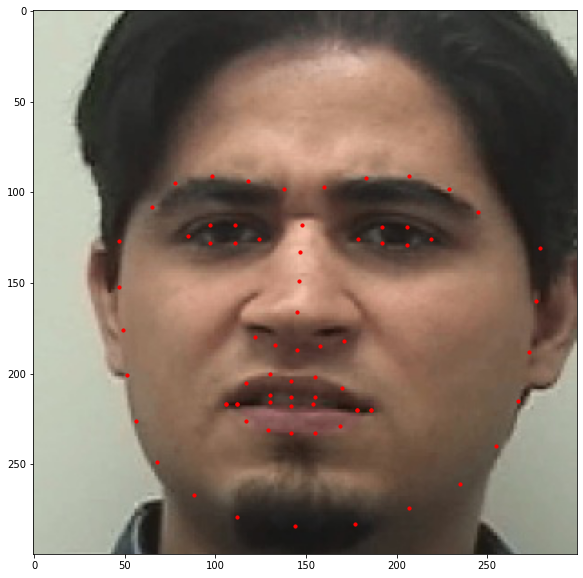

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(points[:,0],points[:,1], s = 10, c = 'red')
plt.savefig('demo_pic.jpg')
plt.show()

In [14]:
points.shape

(72, 2)

In [10]:
import cv2
def resize(oldPath,newPath,factor): 
    """Resize image on 'oldPath' in both dimensions by the same 'factor'. 
    Store as 'newPath'."""
    def r(image,f):
        """Resize 'image' by 'f' in both dimensions."""
        print("current shape:", image.shape)
        print("after transformation:", image.shape[0]*f, image.shape[1]*f)
        newDim = (int(f*image.shape[1]), int(f*image.shape[0]))
        newDim = (320,240)
        return cv2.resize(image, newDim, interpolation = cv2.INTER_AREA)

    cv2.imwrite(newPath, r(cv2.imread(oldPath), factor)) 

resize("images/train/Disgust/trainDisgust040_132.jpg", "trainDisgust040_132_resized.jpg", 0.5)

current shape: (300, 300, 3)
after transformation: 150.0 150.0


In [77]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), 
                  (0, 0, 255), 2)
      
    faces = image[y:y + h, x:x + w]
    cv2.imshow("face",faces)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite('face.jpg', faces)
  
